# Customer Churn Prediction

## Table of Contents

- [Tasks](#tasks)
- [Exploratory Analysis and Extract Insights](#exploratory-analysis-insights)
- [Train/Test Split](#train-test-split)
- [Predictive Model](#predictive-model)
- [Metrics](#metrics)
- [Model Results](#model-results)
    - [Machine Learning Models](#machine-learning-models)
    - [Deep Learning Model](#deep-learning-model)
- [Deployment Issues](#deployment-issues)

## Tasks <a id='tasks'></a>

- Perform exploratory analysis and extract insights from the dataset.
- Split the dataset into train and test sets, and explain the reasoning.
- Build a model to predict which customers are going to churn, and discuss the rationale for choosing algorithms.
- Establish metrics to evaluate model performance.
- Discuss the potential issues with deploying the model into production.

## Exploratory Analysis and Extract Insights <a id='exploratory-analysis-insights'></a>

In [1]:
# Import libraries and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, confusion_matrix
from xgboost import XGBClassifier

# Deep learning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import binary_accuracy
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
# Set random seed for reproducible results
np.random.seed(seed=42)

In [3]:
# Read dataset
df = pd.read_csv('data/raw/Data_Science_Challenge.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
# Print summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [5]:
# Check if each row is unique to 1 customer
len(df) == df['phone number'].nunique()

True

In [6]:
# Check number of unique area codes
df['area code'].nunique()

3

In [7]:
# Check number of unique states
df['state'].nunique()

51

To avoid issues with high dimensionality, state values will be excluded from the dataset.

In [8]:
area_code_dummies = pd.get_dummies(data=df['area code'], dtype='int').add_prefix('area_code_')
area_code_dummies

,area_code_408,area_code_415,area_code_510
0,0,1,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0
...,...,...,...
3328,0,1,0
3329,0,1,0
3330,0,0,1
3331,0,0,1


In [9]:
# Process voice mail plan category
df['voice mail plan'] = df['voice mail plan'].replace(to_replace={'no': 0, 'yes': 1})
df['voice mail plan']

0       1
1       1
2       0
3       0
4       0
       ..
3328    1
3329    0
3330    0
3331    0
3332    1
Name: voice mail plan, Length: 3333, dtype: int64

In [10]:
# Process international plan category
df['international plan'] = df['international plan'].replace(to_replace={'no': 0, 'yes': 1})
df['international plan']

0       0
1       0
2       0
3       1
4       1
       ..
3328    0
3329    0
3330    0
3331    1
3332    0
Name: international plan, Length: 3333, dtype: int64

In [11]:
# Form final dataset
df_final = df.drop(columns=['phone number', 'state', 'area code'])
df_final = pd.concat(objs=[df_final, area_code_dummies], axis=1)
df_final

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,...,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,area_code_408,area_code_415,area_code_510
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,...,91,11.01,10.0,3,2.70,1,False,0,1,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,...,103,11.45,13.7,3,3.70,1,False,0,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,...,104,7.32,12.2,5,3.29,0,False,0,1,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,...,89,8.86,6.6,7,1.78,2,False,1,0,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,...,121,8.41,10.1,3,2.73,3,False,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,0,1,36,156.2,77,26.55,215.5,126,18.32,...,83,12.56,9.9,6,2.67,2,False,0,1,0
3329,68,0,0,0,231.1,57,39.29,153.4,55,13.04,...,123,8.61,9.6,4,2.59,3,False,0,1,0
3330,28,0,0,0,180.8,109,30.74,288.8,58,24.55,...,91,8.64,14.1,6,3.81,2,False,0,0,1
3331,184,1,0,0,213.8,105,36.35,159.6,84,13.57,...,137,6.26,5.0,10,1.35,2,False,0,0,1


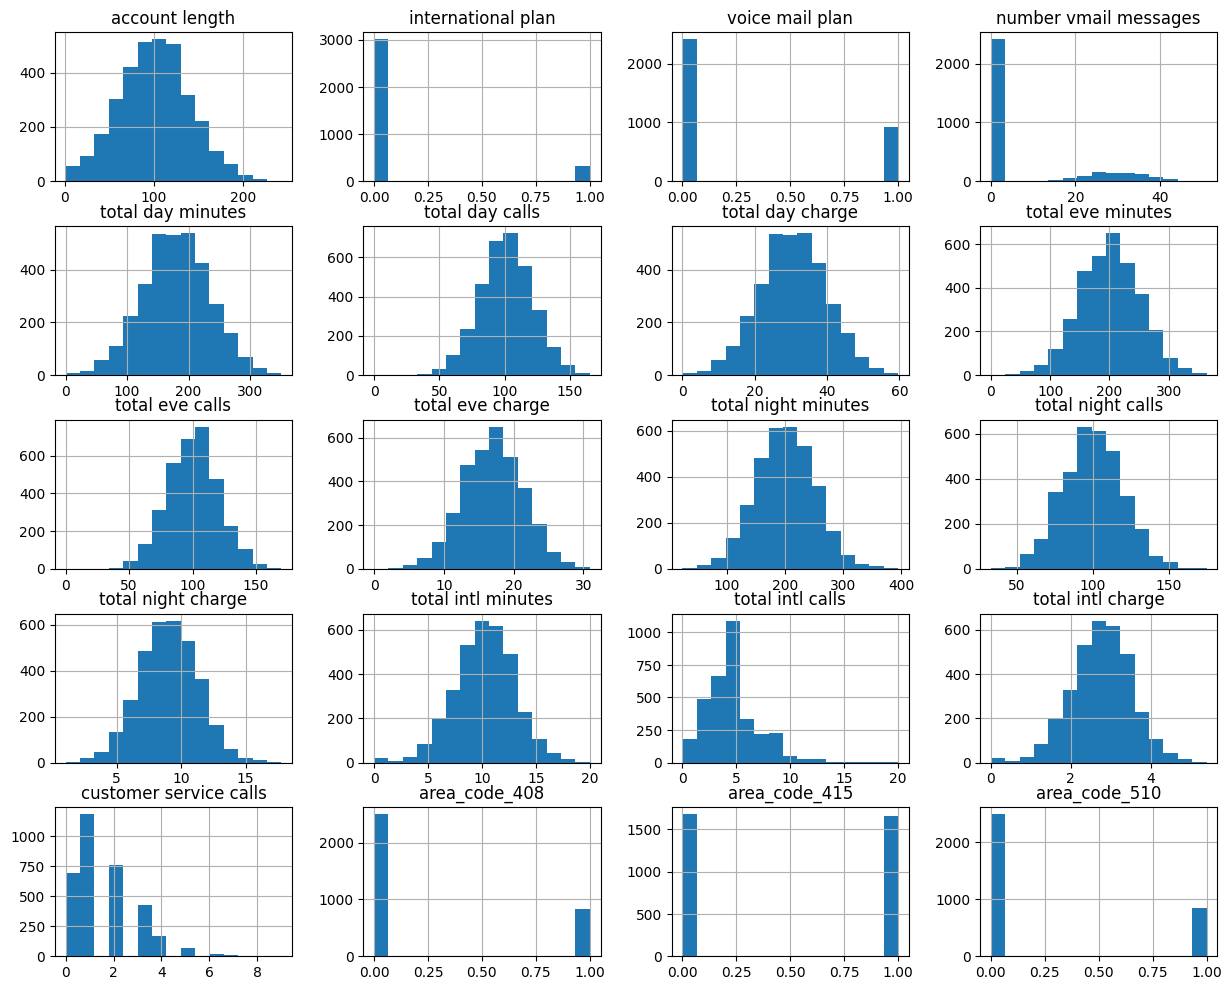

In [12]:
# Visualize distribution of values
df_final.hist(figsize=(15, 12), bins=15)
plt.show()

In [13]:
# Check classes ratio
df_final.groupby(by='churn')['churn'].count()

churn
False    2850
True      483
Name: churn, dtype: int64

From the distributions, the following insights are extracted:

- Most customers do not use international plans and voice mail plans.
- About half of all customers live in area code 415.
- The company earns by total day calls as per the total day charges.
- The dataset is imbalanced so choosing evaluation metrics may be more difficult.

<Axes: >

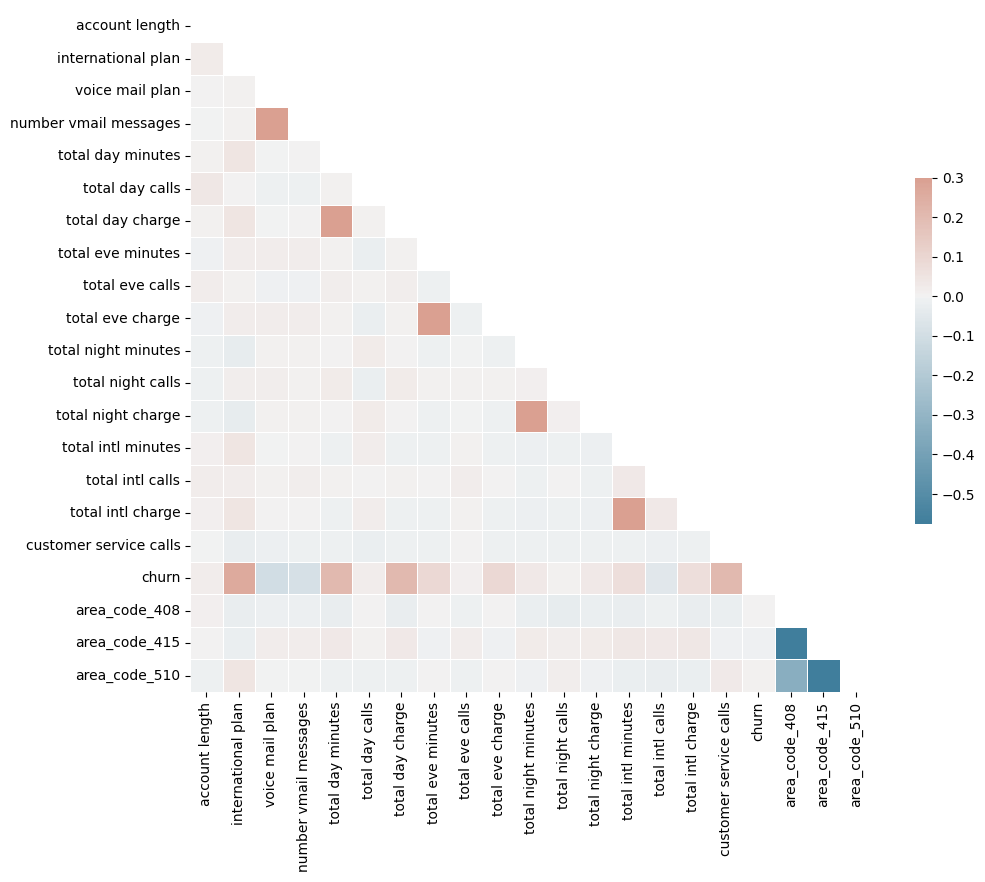

In [14]:
# Create correlation matrix to find insights into relationships between features

# Generate mask for upper triangle
corr = df_final.corr()
mask = np.triu(m=np.ones_like(a=corr, dtype=bool))

# Set up matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate custom diverging color map
cmap = sns.diverging_palette(h_neg=230, h_pos=20, as_cmap=True)

# Draw heat map with mask and correct aspect ratio
sns.heatmap(data=corr, mask=mask, cmap=cmap, 
            vmax=0.3, center=0, square=True, 
            linewidths=0.5, cbar_kws={'shrink': 0.5}
           )

From the correlation matrix, the following insights are observed:

- There is a positive correlation between:
  - total day charge, total day minutes, and churn
  - total evening minutes and total evening charge
  - total night minutes and total night charge
  - total international minutes and total international charge
  - total customer service calls and churn
  - number of voice mail messages and voice mail
  - international plan and churn

- There is a negative correlation between:
  - churn and voice mail plan
  - churn and number of voice mail messages
  - churn and total international calls

In [15]:
# Check feature importance with random forest classifier

# Create LabelEncoder instance
le = LabelEncoder()

# Apply label encoder for 'churn'
y = le.fit_transform(df_final['churn'])

# Drop label column
X = df_final.drop(columns='churn')

# Train, test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create pipeline for preprocessing and modeling
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('forest', RandomForestClassifier(max_depth=5))
])

# Fit model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('forest', RandomForestClassifier(max_depth=5))])

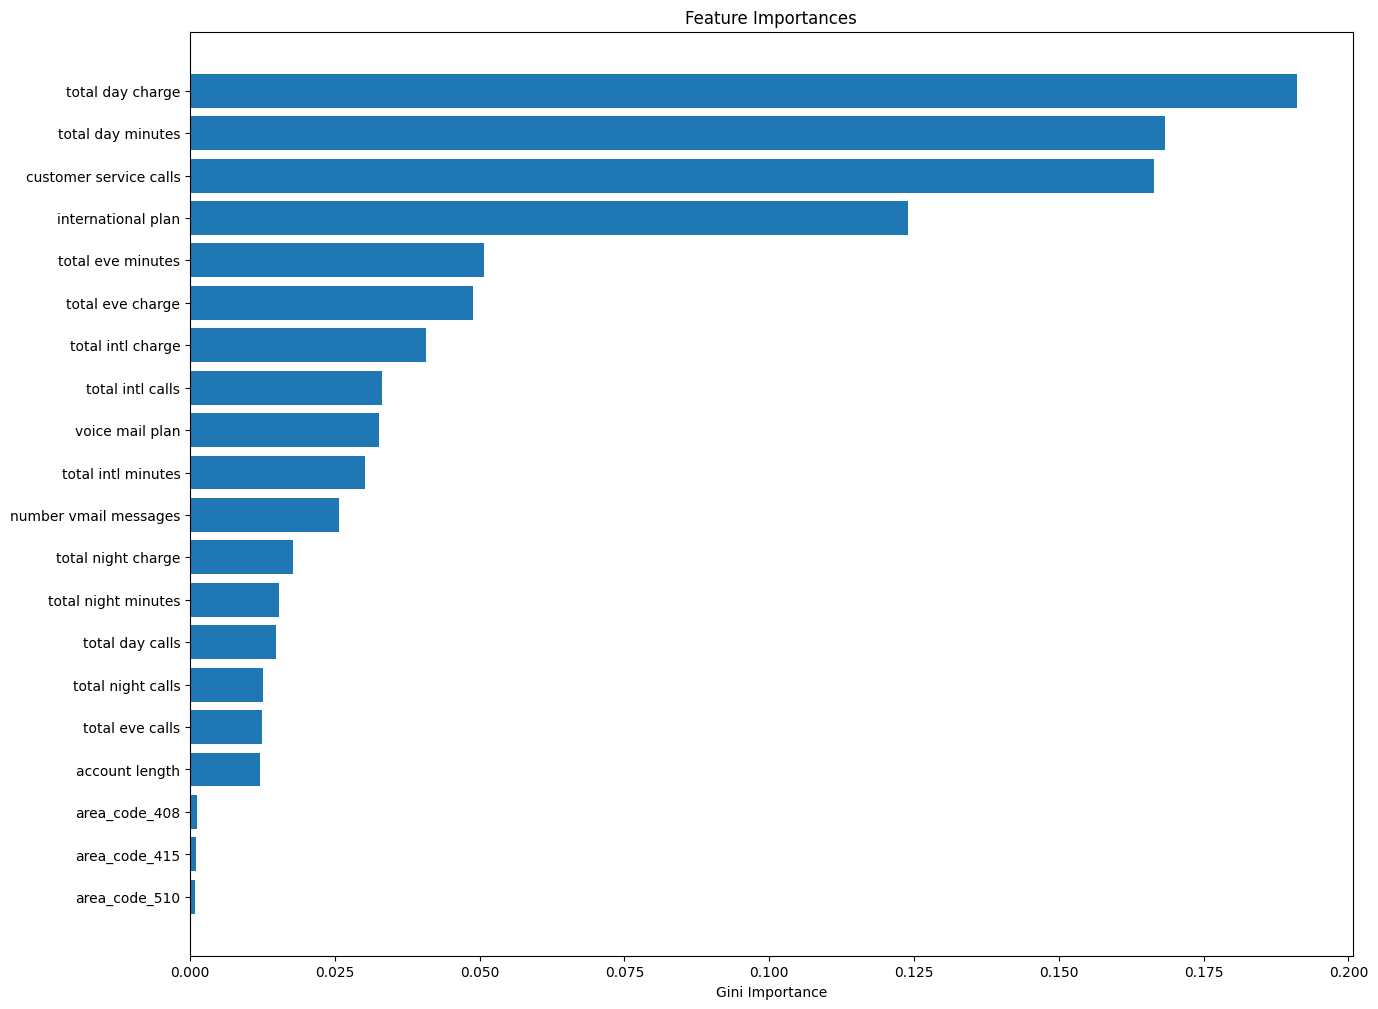

In [16]:
# Get feature importances
feature_importances = pipeline.named_steps['forest'].feature_importances_
feature_names = X.columns

# Create feature importances DataFrame
importances = pd.DataFrame(data={'Feature': feature_names, 'Gini-importance': feature_importances}).sort_values(by='Gini-importance')

# Plot feature importances
plt.figure(figsize=(15, 12))
plt.barh(importances['Feature'], importances['Gini-importance'])
plt.xlabel('Gini Importance')
plt.title('Feature Importances')
plt.show()

The Gini-importance shows which features would be most useful in building a tree-based model with the given features.

The chart above shows the most important 3 features of churn are the following:

- total day charge
- total day minutes
- customer service calls

## Train/Test Split <a id='train-test-split'></a>

This notebook focuses on applying machine learning methods to solve the given problem. Excluding deep learning models, a widely used ratio in applications is a 80%-20% split in the data for train and test data sets. 

Given the data's class imbalance, the stratify option in scikit-learn's `train_test_split()` method ensures a balanced class distribution between the train and test data sets.

In [17]:
# Get features
X = df_final.drop(columns='churn')

# Apply label encoder
le = LabelEncoder()
y = le.fit_transform(df_final['churn'])

# Apply scaler, fit data and transform
X = StandardScaler().fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Predictive Model <a id='predictive-model'></a>

The classifiers listed below will be applied to the data. The best performing model will be selected for use in production.

In [18]:
# Create list of classifier names and instances
names = [
    'Nearest Neighbors',
    'Linear SVM',
    'RBF SVM',
    'Gaussian Process',
    'Decision Tree',
    'Random Forest',
    'Neural Net',
    'AdaBoost',
    'Naive Bayes',
    'QDA',
    'XGBoost'
]

classifiers = [
    KNeighborsClassifier(n_neighbors=3),
    SVC(kernel='linear', C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(kernel=1.0 * RBF(1.0), random_state=42),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    RandomForestClassifier(max_depth=5, random_state=42),
    MLPClassifier(alpha=1, max_iter=1000, random_state=42),
    AdaBoostClassifier(random_state=42),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', seed=0)
]

## Metrics <a id='metrics'></a>

The most common metric for classification tasks is accuracy. In this case, the dataset is imbalanced and needs careful evaluation.

The F1 score balances precision and recall, and provides a robust metric for imbalanced datasets. Here, both accuracy and F1 score will be used in comparing the performances of models.

## Model Results <a id='model-results'></a>

### Machine Learning Models <a id='machine-learning-models'></a>

In [19]:
# Initialize empty list to store results
results = []

# Iterate through classifiers
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    acc_score = clf.score(X_test, y_test)
    y_pred = clf.predict(X_test)
    f_score = f1_score(y_test, y_pred, average='macro')

    # Append results to list
    results.append({'Model': name, 'Accuracy': acc_score, 'F1 Score': f_score})

# Create DataFrame from results list
results_df = pd.DataFrame(data=results)

results_df

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


,Model,Accuracy,F1 Score
0,Nearest Neighbors,0.886057,0.717851
1,Linear SVM,0.848576,0.459043
2,RBF SVM,0.848576,0.459043
3,Gaussian Process,0.932534,0.849075
4,Decision Tree,0.937031,0.863856
5,Random Forest,0.899550,0.727488
6,Neural Net,0.934033,0.851688
7,AdaBoost,0.877061,0.702375
8,Naive Bayes,0.853073,0.701884
9,QDA,0.866567,0.777504


Visualize the decision tree to find how tree-based algorithms decide for this case.

In [20]:
# Define plot_decision_tree
def plot_decision_tree(max_depth, criterion_type, split_type):
    """
    Arguments:
    
    max_depth: depth of tree
    criterion_type: 'gini' or 'entropy'
    split_type: 'best' or 'random'

    Return:
    
    plt.show(): plot of decision tree
    """
    # Model
    clf = DecisionTreeClassifier(max_depth=max_depth, criterion=criterion_type, splitter=split_type, random_state=42)
    clf.fit(X_train, y_train)
        
    # Plot decision tree
    plt.figure(figsize=(12, 8))
    plot_tree(clf, filled=True, feature_names=df_final.drop(columns='churn').columns.to_list(), class_names=['Not churn', 'Churn'], rounded=True, precision=2)
    plt.show()

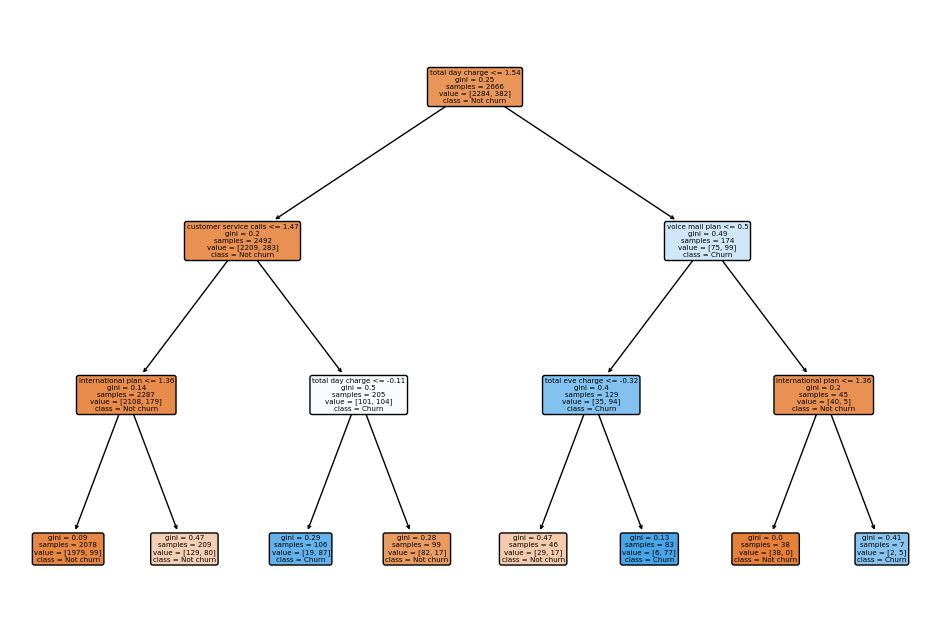

In [21]:
# Plot decision tree
plot_decision_tree(max_depth=3, criterion_type='gini', split_type='best')

### Deep Learning Model <a id='deep-learning-model'></a>

In [22]:
# Use consistent random seed
np.random.seed(seed=42)

# Sequential model with layers argument
classifier = Sequential([
    Dense(units=6, kernel_initializer='uniform', activation='relu', input_dim=X.shape[1]),
    Dense(units=6, kernel_initializer='uniform', activation='relu'),
    Dense(units=1, kernel_initializer='uniform', activation='sigmoid')
])

# Compile artificial neural network (ANN)
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=[binary_accuracy])

# Use early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Fit ANN to training set and evaluate on validation set
history = classifier.fit(
    X_train, y_train,
    batch_size=10,
    epochs=100,
    validation_data=(X_test, y_test),
    verbose=0,
    callbacks=[early_stopping]
)

2023-12-02 16:02:58.007880: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Max
2023-12-02 16:02:58.007899: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2023-12-02 16:02:58.007907: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2023-12-02 16:02:58.007937: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-12-02 16:02:58.007951: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2023-12-02 16:02:58.339833: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


In [23]:
# Evaluate on test set
loss, accuracy = classifier.evaluate(X_test, y_test, batch_size=10)
print(f'Test accuracy: {accuracy:.4f}')

# Predict test set results
y_pred = (classifier.predict(X_test) > 0.5).astype(int)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print('Test F1 Score:', f1)

67/67 [==============================] - 0s 4ms/step - loss: 0.3316 - binary_accuracy: 0.8591
Test accuracy: 0.8591
21/21 [==============================] - 0s 2ms/step
Confusion Matrix:
 [[549  17]
 [ 77  24]]
Test F1 Score: 0.3380281690140845


This artificial neural network model, without further experimentation, shows worse performance than the tree-based algorithms.

In this case, the XGBoost algorithm is the best choice for production because it displays high accuracy and high F1 score.

## Deployment Issues <a id='deployment-issues'></a>

Post ML model deployment, ongoing performance monitoring is crucial to detect potential degradation due to internal or external factors. Periodic model updates, involving training with recent data, are recommended to prevent common issues. In the MLOps cycle, two significant problems are:

- Data Drift: This occurs when the model's input distribution changes, possibly due to issues in data pipelines or a shift in the problem nature. Solutions involve fixing data engineering pipelines or retraining the model with more recent data.

- Concept Drift: This arises when the functional relationship between model inputs and outputs changes, and the model is unaware of the shift. Addressing concept drift may require learning a new model or even switching to a different algorithm if the current one's performance is insufficient for production use.

Inspired by the [Customer Churn Prediction](https://platform.stratascratch.com/data-projects/customer-churn-prediction) data project on [StrataScratch](https://www.stratascratch.com/).